# Bike Sharing Case Study Assignment

# Step 1: Understanding the Data

In [1]:
# Supress the Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the libraries
import numpy as np
import pandas as pd

In [3]:
bike_df = pd.read_csv('/content/day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the Dataset - Analysis

In [4]:
bike_df.shape

(730, 16)

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000



`In the Bike Prediction dataset there are a total of 730 rows and 16 columns in which we need to use the 'CNT' column for the prediction purposes.`

### Data Quality Assessment

In [7]:
# percentage of missing values in each column
round(100*(bike_df.isnull().sum()/len(bike_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# percentage of missing values in each row
round(100*(bike_df.isnull().sum(axis=1)/len(bike_df)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### <font color = 'blue'>Observation:</font>
No missing/NULL values found

In [9]:
# Checking for duplicate values

bike_dup = bike_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [10]:
bike_df.shape

(730, 16)

#### <font color = 'blue'>Observation:</font>
The duplicate values are not persent

### Data Cleaning

After conducting a high-level review of the data and consulting the data dictionary, the following variables can be excluded from further analysis:

"instant": This column serves as an index, which duplicates the functionality of the default index.

"dteday": Since we already have separate columns for year and month, containing date information, we can proceed with our analysis without this redundant column.

"casual" and "registered": These columns provide counts of bike bookings by different customer categories. However, since our analysis focuses on the total bike count rather than specific categories, we will omit these columns.

We will save the modified dataframe as "bike_df1" to ensure the preservation of the original dataset for potential future analysis or validation.

In [11]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
bike_df1 = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2: Visualize the Data

> Indented block



Here, we will perform the following tasks:

- Assessing the linearity of relationships between variables, which is crucial for determining the suitability of a linear model.
- Identifying any multicollinearity among predictors.
- Exploring potential predictors that exhibit a strong association (correlation) with the outcome variable.
- We will visualize our data using matplotlib and seaborn.

In [13]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables : Using a pairplot

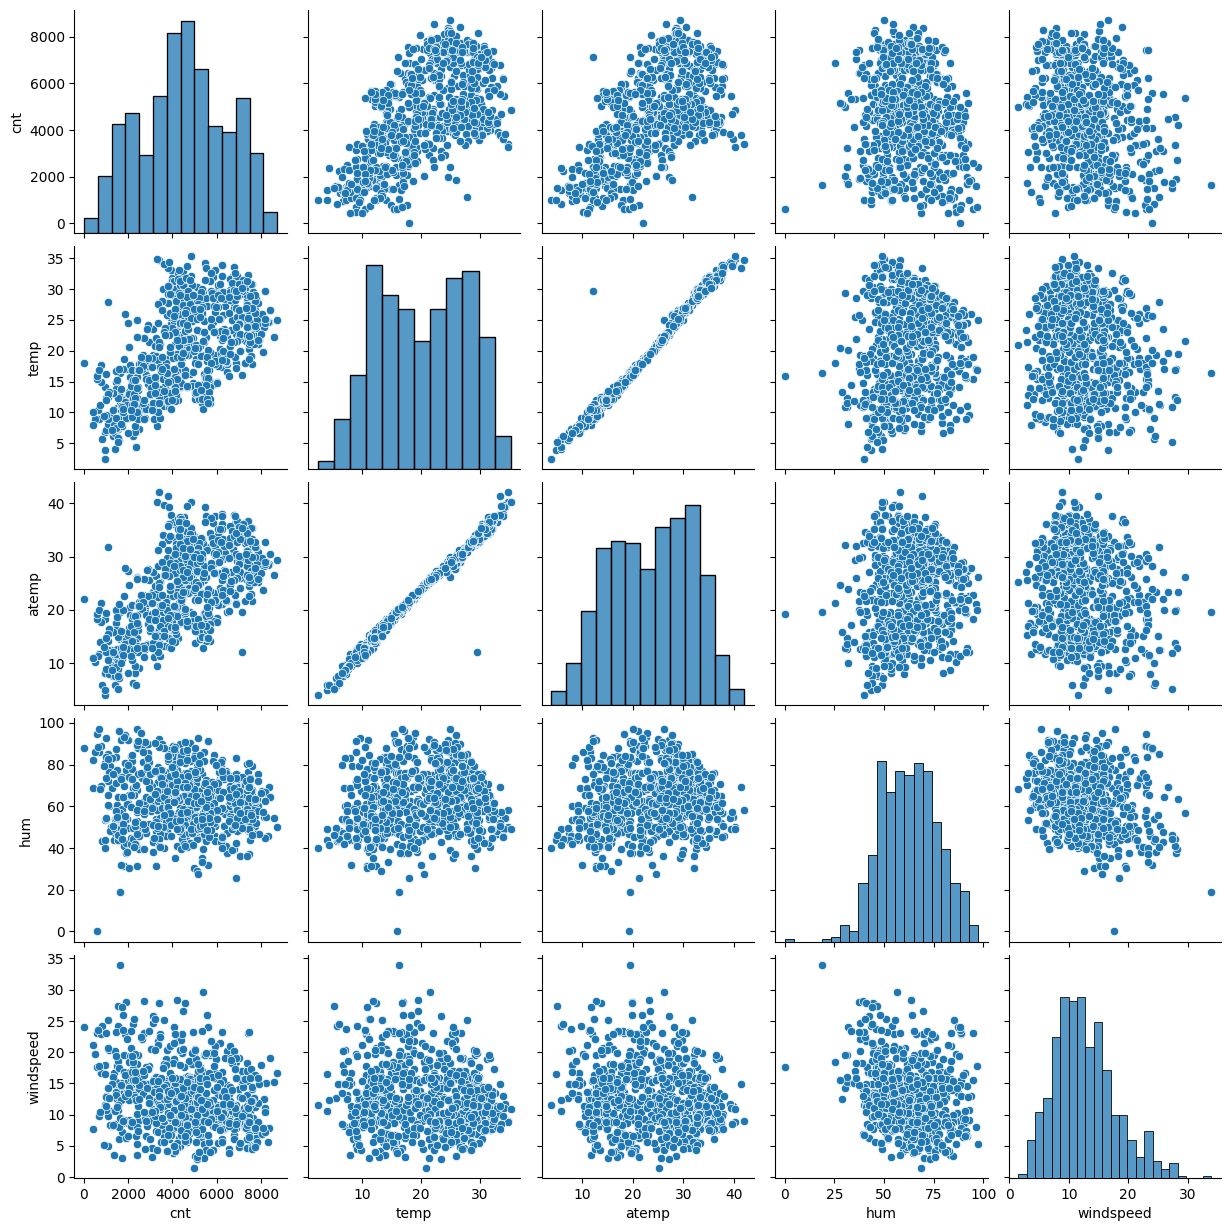

In [14]:
sns.pairplot(data=bike_df1, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### <font color = 'blue'>Observation:</font>
By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc. that show a positive correlation with the target variable cnt .  

#### Visualising Categorical Variables : boxplot analysis

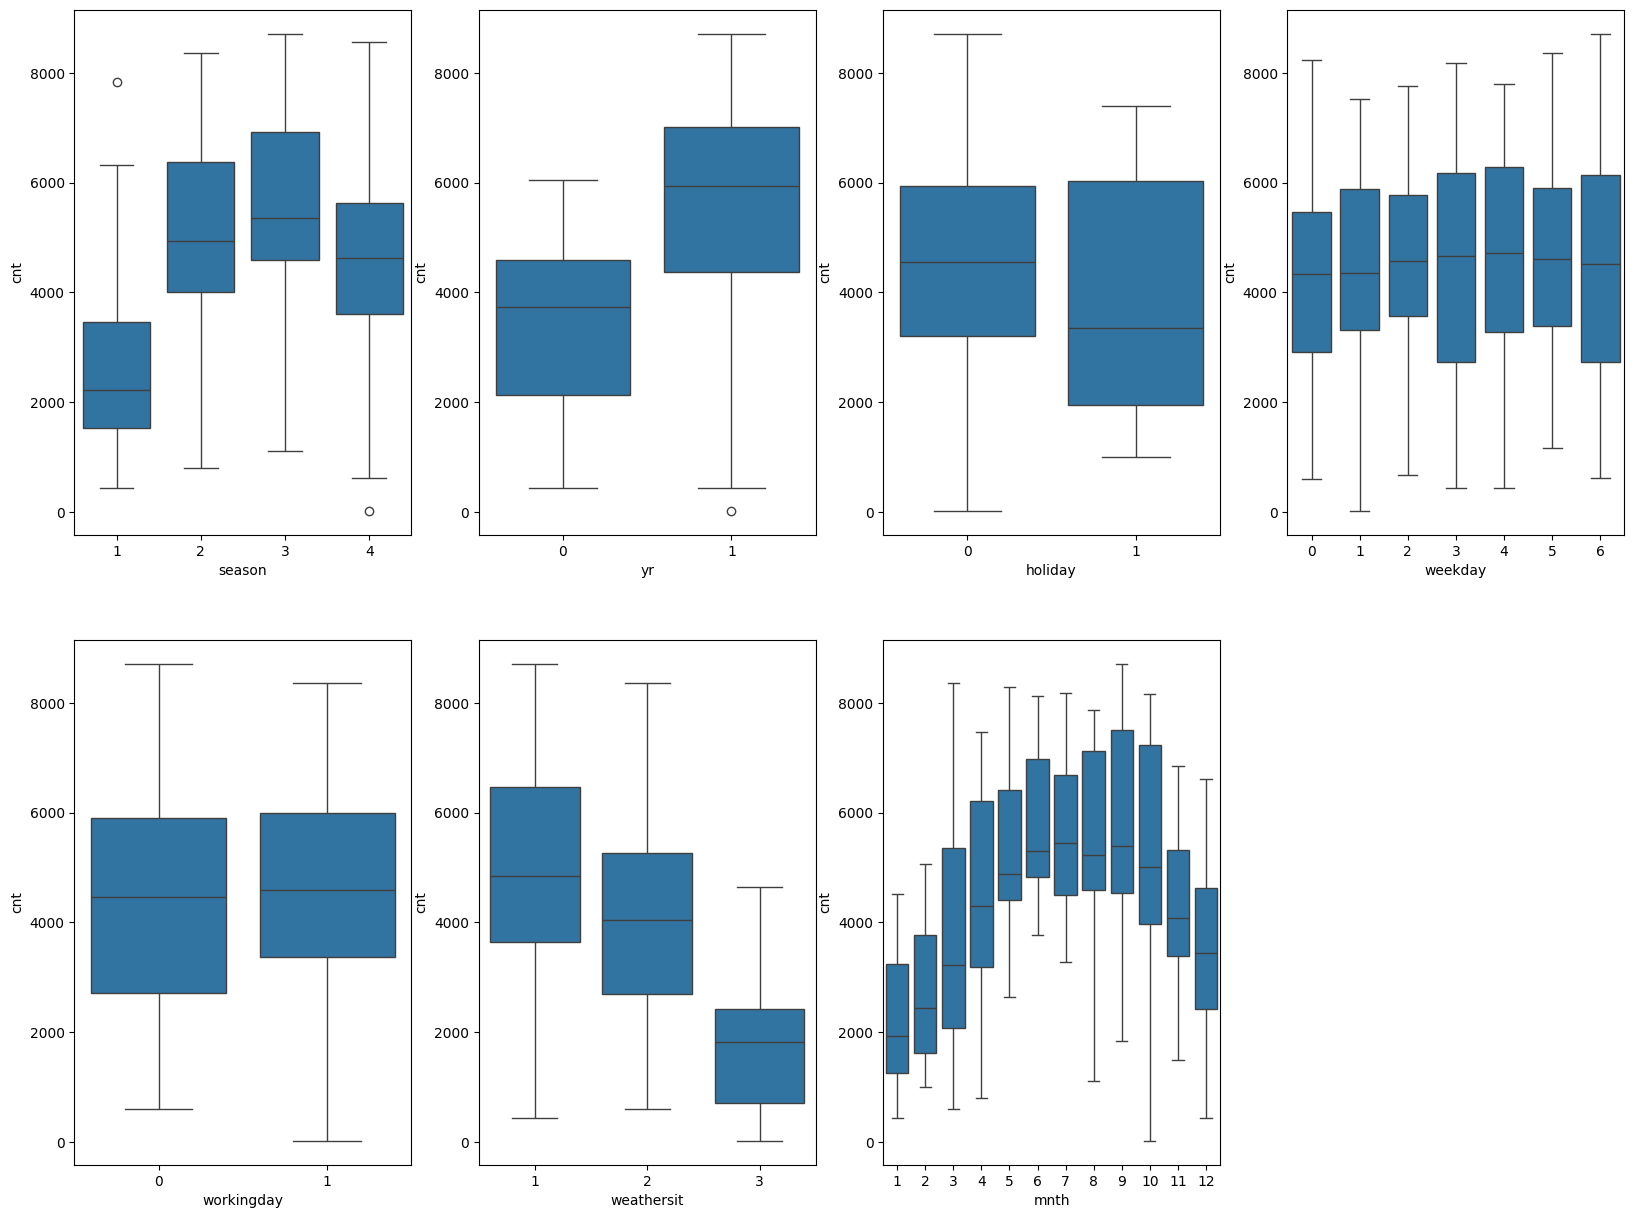

In [15]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df1)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df1)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df1)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df1)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df1)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df1)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df1)
plt.show()

#### <font color = 'blue'>Observation:</font>
- The visual representations effectively depict the qualitative distributions of the data, thereby bolstering our confidence in the model's predictions by highlighting significant predictors.
- Upon examining the variable "season," it becomes apparent that Fall (category 3) demonstrates the highest median, suggesting heightened demand during this season, while Spring (category 1) displays the lowest.
- Notably, there was a significant increase in user counts in 2019 compared to 2018.
- Rental counts exhibit a consistent pattern across the days of the week.
- Adverse weather conditions, such as heavy rain or snow, coincide with a complete absence of users, indicating that weather strongly influences user activity. Conversely, clear or partly cloudy weather conditions are associated with the highest user counts.
- Peaks in rentals occur in September, contrasting with December peaks. This observation aligns with weather patterns, as significant snowfall in December likely leads to a decrease in rentals.
- User counts tend to decrease during holidays.
- Analysis of the "Workingday" boxplot reveals consistent median user counts ranging between 4000 and 6000 throughout the week, suggesting minimal discrepancy in bookings between working and non-working days.

## Step 3: Preparation of Data

#### Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [16]:
import calendar
bike_df1['mnth'] = bike_df1['mnth'].apply(lambda x: calendar.month_abbr[x])

In [17]:
# Maping seasons
bike_df1.season = bike_df1.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [18]:
# Mapping weathersit
bike_df1.weathersit = bike_df1.weathersit.map({1:'Clear',2:'Mist & Cloudy',
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [19]:
#Mapping Weekday
bike_df1.weekday = bike_df1.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [20]:
# Lets overlook the dataframe now

bike_df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Creating the Dummy Variables
The variables `mnth` `weekday` `season` `weathersit` have various levels, for ex, `weathersit` has 3 levels , similarly variable `mnth` has 12 levels.   
We will create DUMMY variables for these 4 categorical variables namely - `mnth`, `weekday`, `season` & `weathersit`.

In [21]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bike_df1[['season','mnth','weekday','weathersit']]

In [22]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [23]:
# Adding the dummy variables to the original dataset
bike_df1 = pd.concat([dummy,bike_df1],axis = 1)

In [24]:
#Deleting the orginal columns season.weathersit,weekday,mnth

bike_df1.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

bike_df1.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
bike_df1.shape

(730, 30)

In [26]:
bike_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

## Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_df1, train_size = 0.7, random_state = 100)

In [28]:
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


## Step 5: Rescaling the Features for Model
Although scaling doesn't impact the linear model in the case of simple linear regression, it can significantly affect the model when performing multiple linear regression. This is particularly notable when considering the variable "cnt," which has much higher values compared to other features like "temp" or "atemp." Therefore, it's crucial to rescale the variables to ensure they are on a comparable scale. Failure to do so could result in some coefficients being disproportionately large or small compared to others, leading to challenges during model evaluation. To address this issue, it's recommended to use standardization or normalization techniques so that the coefficients obtained are all on the same scale. Two common methods of rescaling include Min-Max scaling and Standardization (mean-0, sigma-1). This time, we will implement MinMax scaling.

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [31]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [32]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the coefficients to see which variables are highly correlated

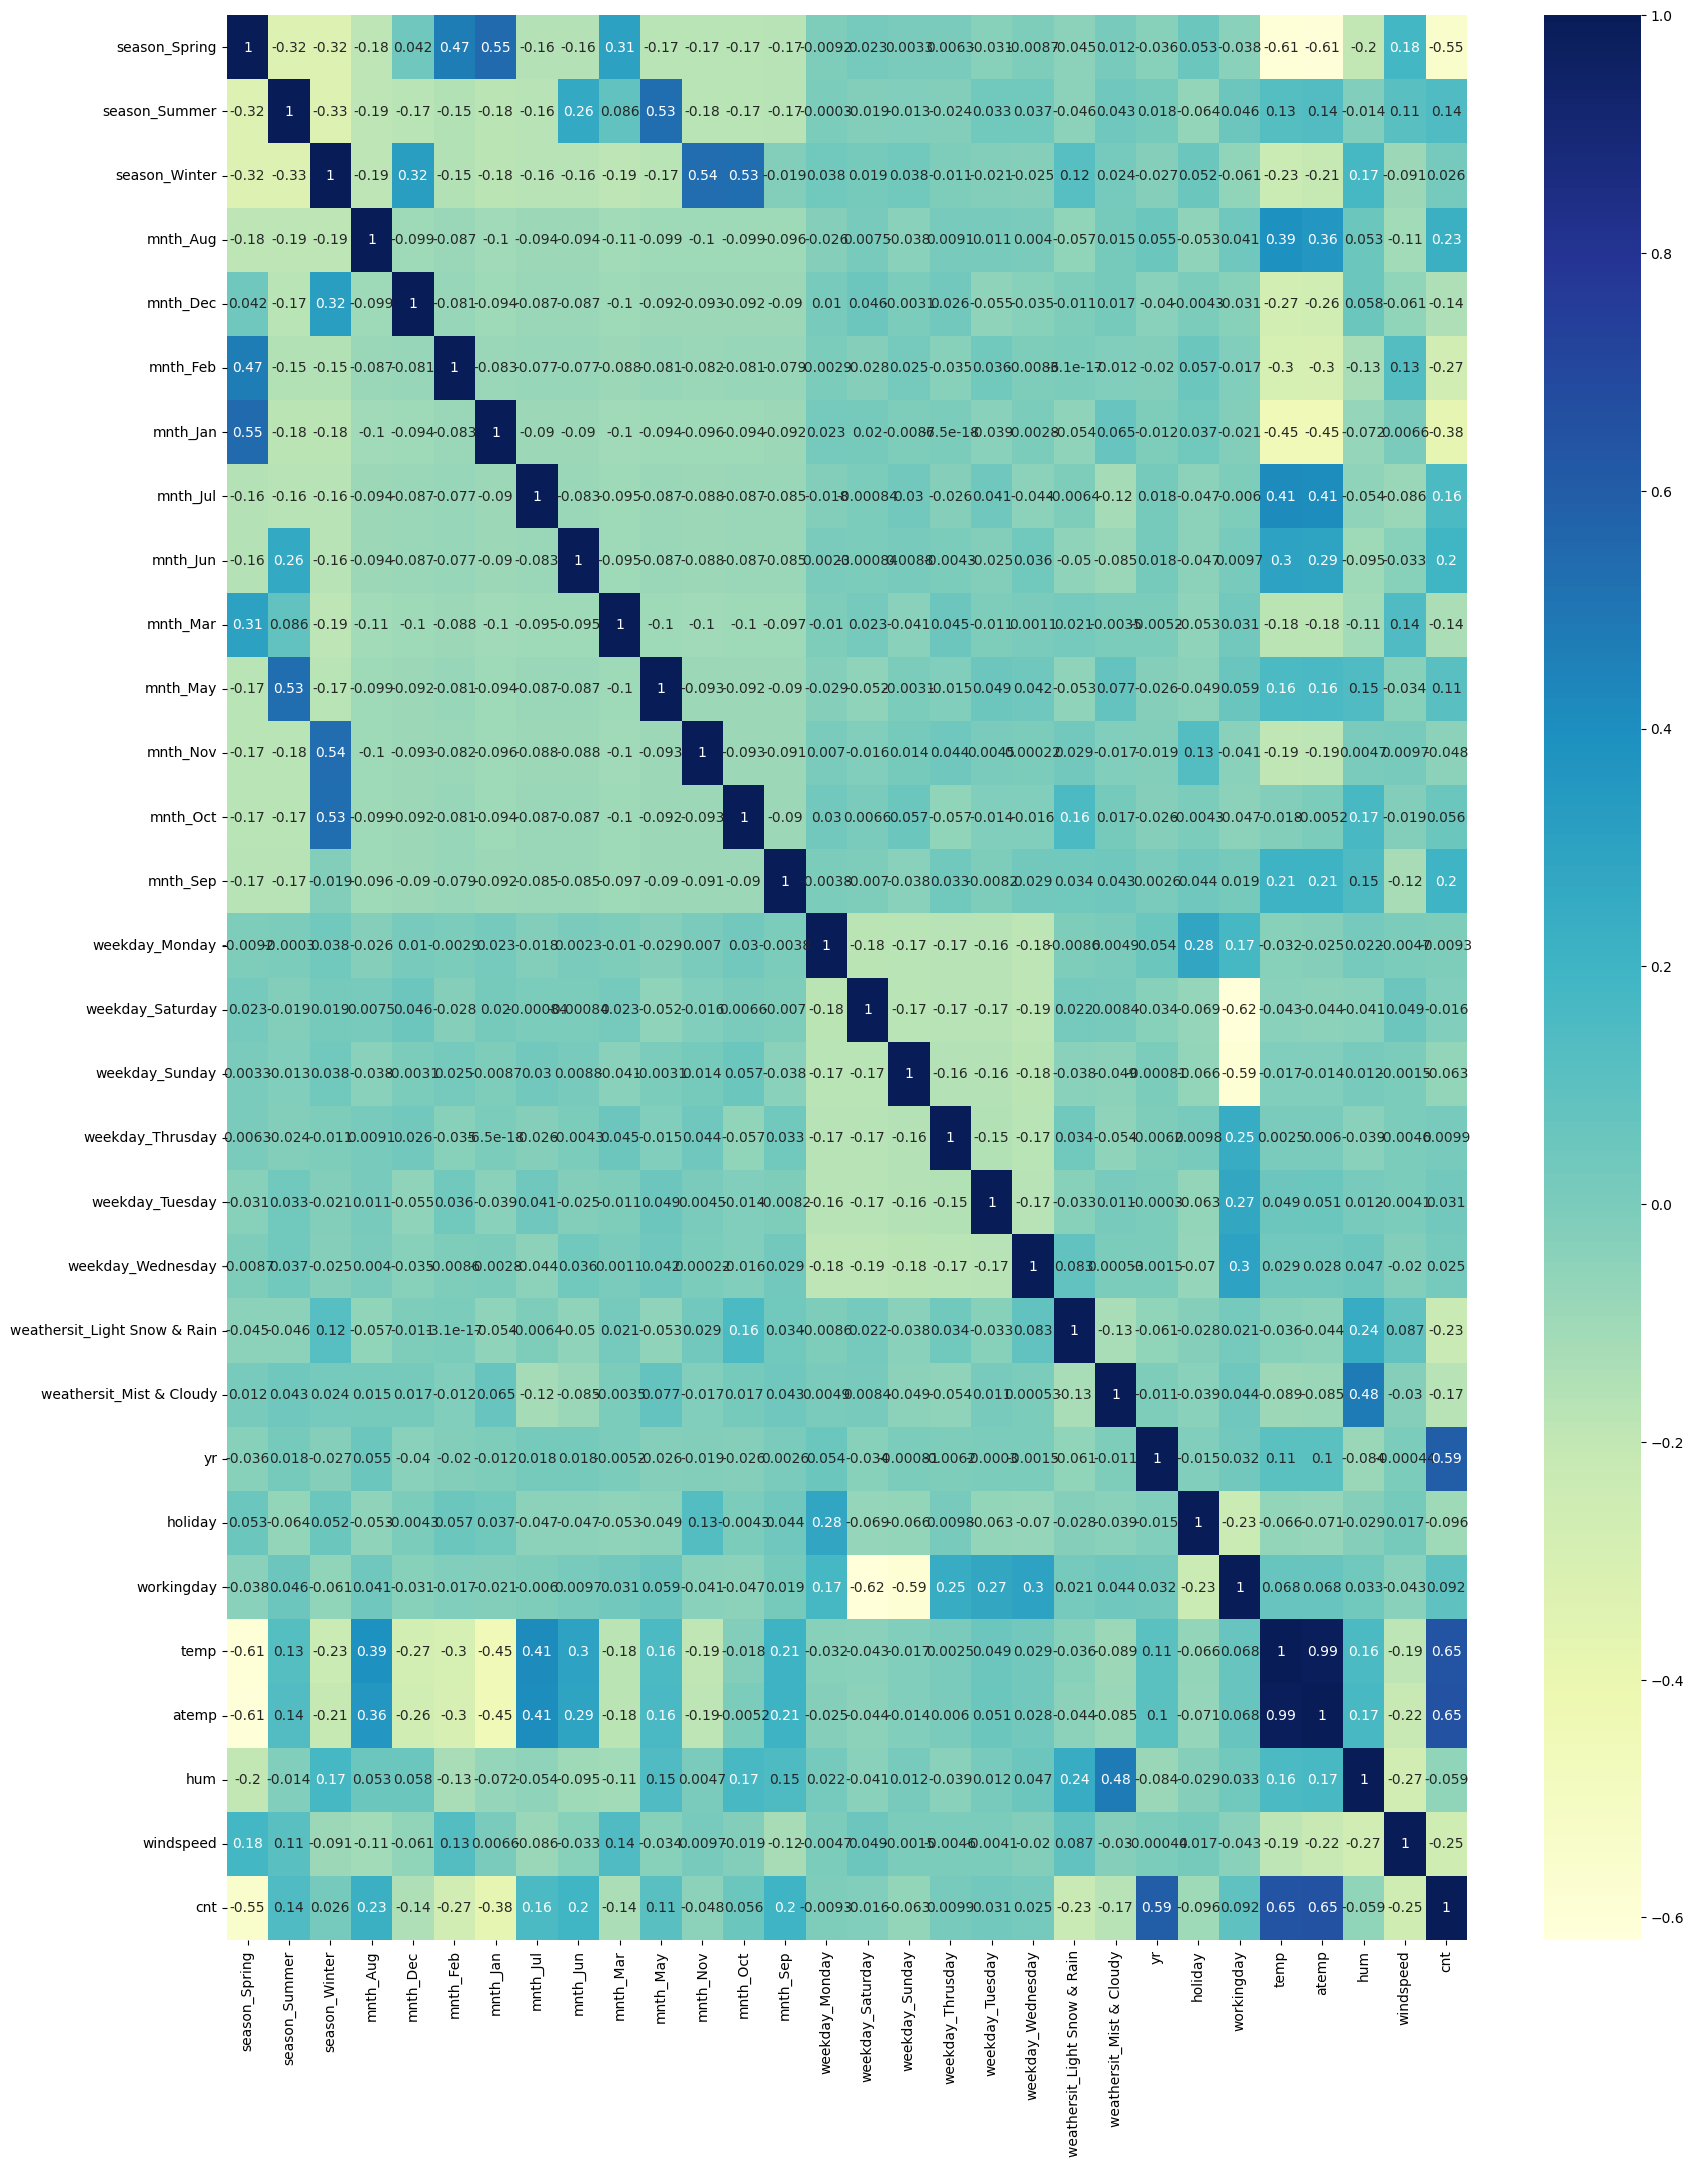

In [33]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### <font color = 'blue'>Observation:</font>
As observed from the map, there appears to be a correlation between "atemp" and "temp" with the target variable "cnt." Since there isn't sufficient evidence to make definitive statements about the other independent variables, we will construct a model using all the columns.

### Dividing into X and Y sets for the model building

In [34]:
y_train = train.pop('cnt')
X_train = train

In [35]:
y_train.shape

(510,)

## Step 6: Making first linear model


We will employ a hybrid approach in constructing the model. Initially, we will utilize the Recursive Feature Elimination (RFE) technique for feature selection, followed by implementing the statsmodel approach to build the model.

### Feature Selection

We start with 15 variables.  
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [36]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 6),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

#### Building model using statsmodel for the detailed statistics

In [41]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

#### Adding a constant variable
In statsmodels, it's necessary to explicitly include a constant term by using sm.add_constant(X). Failing to do so will result in statsmodels fitting a regression line through the origin as the default behavior.

In [42]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [43]:
X_train_lm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,1.0,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


#### Building the first linear models using statsmodels

In [44]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          4.22e-191
Time:                        16:28:25   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2519      0.036      6.969      0.000       0.181       0.323
season_Spring                   -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer                    0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter                    0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                        -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                        -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                         0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Saturday                 0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow & Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist & Cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
yr                               0.2305      0.008     28.795      0.000       0.215       0.246
holiday                         -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                       0.0433      0.012      3.762      0.000       0.021       0.066
temp                             0.5096      0.034     14.837      0.000       0.442       0.577
hum                             -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                       -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <font color = 'blue'>Observation:</font>
Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and check VIF.

### Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
13,hum,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.46
1,season_Summer,2.85
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


#### In general we want VIF to be less than 5. We will drop feature `hum` which has highest VIF of 30.89

In [47]:
# dropping season_Spring since its vif > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#### Model 2.0

In [48]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 21 Feb 2024   Prob (F-statistic):          1.60e-188
Time:                        16:28:25   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1737      0.031      5.520      0.000       0.112       0.235
season_Spring                   -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_Summer                    0.0445      0.015      2.967      0.003       0.015       0.074
season_Winter                    0.0784      0.017      4.562      0.000       0.045       0.112
mnth_Jan                        -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_Jul                        -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_Sep                         0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Saturday                 0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Light Snow & Rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist & Cloudy        -0.0813      0.009     -9.437      0.000      -0.098      -0.064
yr                               0.2345      0.008     29.009      0.000       0.219       0.250
holiday                         -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                       0.0464      0.012      3.966      0.000       0.023       0.069
temp                             0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                       -0.1563      0.025     -6.286      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.68
0,season_Spring,3.07
1,season_Summer,2.34
9,yr,2.08
2,season_Winter,1.98
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


#### <font color = 'blue'>Observation:</font>

Given that both the VIFs and p-values fall within acceptable ranges, we conclude that "lm_2" is the final model to proceed with for future predictions.


## Step 7: Train Data Residual Analysis

To ensure that the error terms also adhere to the assumption of normal distribution, which is fundamental in linear regression, we will plot a histogram of the error terms to visually inspect their distribution.

In [50]:
y_train_pred = lm_2.predict(X_train_lm)

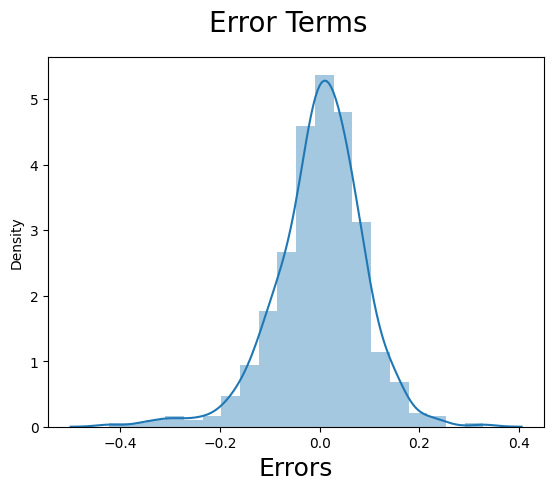

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

#### <font color = 'blue'>Observation:</font>

The histogram demonstrates that the error terms are centered around 0 and exhibit a distribution that aligns with the assumptions of linear regression.


#### Cross-verifying the above conclusion using a qq-plot as well:

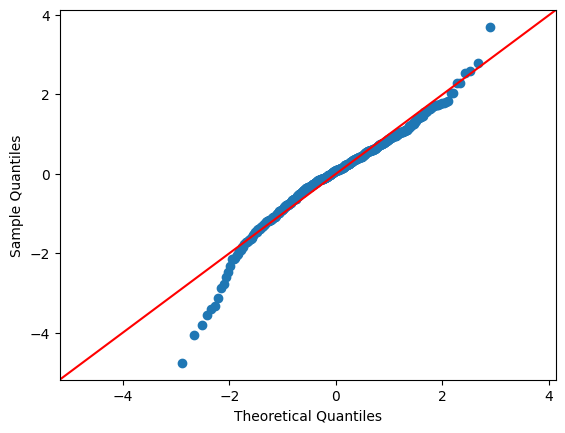

In [52]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### <font color = 'blue'>Observation:</font>
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

## Step 8: Predictions Using the Latest Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

#### Applying the scaling on the test sets

In [53]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [54]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [55]:
y_test = test.pop('cnt')
X_test = test

In [56]:
# Making predictions using the final model

X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_2.predict(X_test)

#### Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [57]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8428227495513763
r2_score of test dataset 0.8050495669880955


#### <font color = 'blue'>Observation:</font>

We can see that the `r_squared on the test set is 0.813` and the `r-squared on the trained set 0.839` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Step 9: Final Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

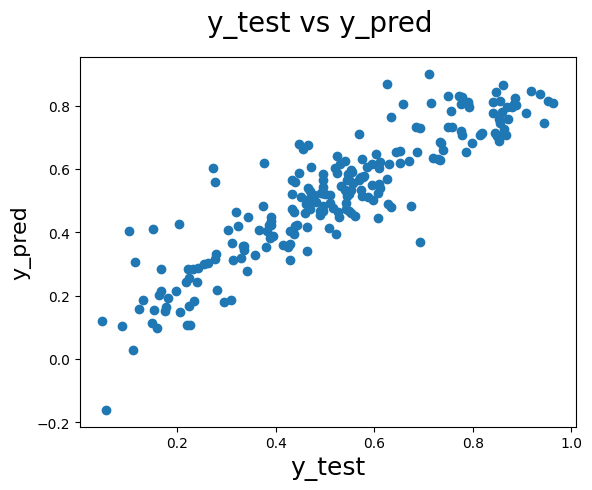

In [58]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

#### <font color = 'blue'>Observation:</font>
We can colude that the final model fit isn't by chance, and has descent predictive power.

#### Displaying variable names and the coefficient values for the final equation of the best fitted line

In [59]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
13,temp,0.472207
10,yr,0.234461
0,const,0.173669
3,season_Winter,0.078366
6,mnth_Sep,0.075470
7,weekday_Saturday,0.058305
12,workingday,0.046359
2,season_Summer,0.044507
4,mnth_Jan,-0.039197


#### <font color = 'blue'>Observation:</font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

`cnt = 0.245 + 0.4387 \times  temp + 0.2342  \times  yr + 0.0868 \times season Winter + 0.0687 \times mnth Sept + 0.0348 \times season Summer - 0.0395 \times mnth Nov - 0.0428 \times mnth Dec - 0.0500 \times mnth Jan - 0.0500 \times mnth Jul - 0.0712 \times season Spring - 0.0800 \times weathersit Mist Cloudy - 0.0917 \times holiday - 0.1584 \times windspeed - 0.2917 \times weathersit Light Snow Rain`

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
##### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- The R-Squared and adjusted R-Squared values for both the training and test datasets suggest that the selected variables can effectively account for over 81% of the variance in bike demand.
- The coefficients of the variables provide insights into the factors influencing bike demand.
- According to the final model, the top three features significantly contributing to explaining demand are as follows:
 - Temperature (0.438717)
 - Weather situation: Light Snow, Light Rain + Mist & Cloudy (-0.291749)
 - Year (0.234455)
- Therefore, it can be conclusively stated that variables such as temperature, weather situation, and year are significant predictors of shared bike demand.


#### <font color = 'blue'>Recommendations:</font>

- The company should prioritize months like January, July, September, November, and December, as they consistently exhibit higher demand compared to other months.
- Tracking weather conditions is crucial, as demand tends to rise with increasing temperatures.
- Preparation is key during the winter season, as demand typically escalates during this period.
- Holiday periods appear to generate less interest in biking; implementing targeted marketing efforts and incentives could help stimulate demand during these times.